# Capstone Project 2: Lending Club

# Data Cleaning & Analysis

## Import Libraries

In [1]:
import pandas as pd #for building pandas dataframes for analysis
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np #fundamental package for scientific computing with Python

import matplotlib.pyplot as plt #for visualizations
import seaborn as sns #for neat visualizations
import scipy.stats as stats #large number of probability distributions and statistical functions
import statsmodels as sm #provides estimation of many different statistical models, tests and data exploration 
import patsy as p
import brewer2mpl as b

from ggplot import *
%matplotlib notebook
%matplotlib inline


from datetime import datetime, date #Create auto date/time

/Users/carolinerosefrensko/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/carolinerosefrensko/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/carolinerosefrensko/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data Cleaning

### Read Necessary Files

In [2]:
Approved_2015_16= pd.read_csv('/Users/carolinerosefrensko/Downloads/Lending Club Loan Data/LoanStats15_16.csv', skiprows=1, low_memory=False)

In [3]:
Rejected_2015_16 = pd.read_csv('/Users/carolinerosefrensko/Downloads/Lending Club Rejected Loan Data/RejectStats15_16.csv', skiprows=1, low_memory=False)

### Data Overview

In [4]:
Approved_2015_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Columns: 145 entries, id to settlement_term
dtypes: float64(107), object(38)
memory usage: 465.8+ MB


In [5]:
Rejected_2015_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859379 entries, 0 to 2859378
Data columns (total 9 columns):
Amount Requested        float64
Application Date        object
Loan Title              object
Risk_Score              float64
Debt-To-Income Ratio    object
Zip Code                object
State                   object
Employment Length       object
Policy Code             int64
dtypes: float64(2), int64(1), object(6)
memory usage: 196.3+ MB


In [6]:
Approved_2015_16.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,33600.0,33600.0,33600.0,36 months,10.78%,1096.53,B,B4,Aviation Safety Inspector,8 years,RENT,104000.0,Source Verified,Dec-2015,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,441xx,OH,14.01,0.0,Nov-2000,2.0,29.0,NaN,14.0,0.0,28475.0,51.8%,31.0,w,0.00,0.00,34309.15,34309.15,33600.00,709.15,0.00,0.0,0.000,Mar-2016,33262.93,NaN,Mar-2016,0.0,29.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,42952.0,0.0,1.0,0.0,0.0,50.0,14477.0,NaN,1.0,1.0,12992.0,52.0,55000.0,1.0,0.0,5.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,92909.0,42952.0,33200.0,37909.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,17600.0,17600.0,17600.0,60 months,19.89%,465.22,E,E3,RN,< 1 year,RENT,44000.0,Verified,Dec-2015,Current,n,NaN,NaN,credit_card,NaN,322xx,FL,17.56,0.0,Jun-2006,0.0,NaN,NaN,7.0,0.0,12900.0,102.4%,25.0,w,10926.87,10926.87,13907.98,13907.98,6673.13,7234.85,0.00,0.0,0.000,Jul-2018,465.22,Aug-2018,Jul-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,133285.0,0.0,4.0,0.0,1.0,13.0,120385.0,83.0,0.0,0.0,5998.0,91.0,12600.0,0.0,1.0,0.0,1.0,19041.0,0.0,102.4,0.0,0.0,112.0,114.0,25.0,13.0,0.0,25.0,NaN,NaN,NaN,0.0,3.0,3.0,3.0,3.0,21.0,3.0,4.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,139633.0,133285.0,12600.0,127033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000.0,20000.0,20000.0,36 months,14.85%,691.84,C,C5,GM,6 years,RENT,110000.0,Not Verified,Dec-2015,Current,n,NaN,NaN,credit_card,Cr

In [7]:
Rejected_2015_16.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,30000.0,2015-01-01,debt_consolidation,681.0,35.65%,958xx,CA,< 1 year,0
1,5000.0,2015-01-01,debt_consolidation,648.0,10.62%,945xx,CA,< 1 year,0
2,10000.0,2015-01-01,Debt consolidation,721.0,10.02%,750xx,TX,7 years,0
3,10000.0,2015-01-01,major_purchase,659.0,19.05%,853xx,AZ,< 1 year,0
4,5000.0,2015-01-01,debt_consolidation,501.0,10.73%,475xx,IN,< 1 year,0


In [8]:
Approved_2015_16.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,0.0,421093.000000,421095.000000,421095.000000,217133.000000,74415.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,122729.000000,421095.0,511.000000,509.000000,421095.000000,421095.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,421095.00000,421095.000000,417132.000000,416868.000000,421095.000000,421095.000000,408841.000000,421095.000000,421095.000000,421095.000000,421095.000000,417297.000000,108600.000000,376496.000000,151737.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421094.000000,421095.000000,421095.000000,401865.000000,421095.000000,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2275.0,2275.000000,2275.0,2275.000000,1863.000000,2275.000000,2275.000000,9223.000000,9223.000000,9223.000000
mean,NaN,15240.285862,15240.285862,15234.156426,441.845746,7.696561e+04,NaN,19.148367,0.347397,0.572690,34.023391,66.592609,11.948643,0.233776,1.768548e+04,25.493468,1570.149056,1569.402984,14916.519164,14910.725009,11834.811812,2897.107625,1.582468e+00,183.017258,32.589091,4093.409610,0.020240,43.809866,1.0,109981.011585,18.310118,0.006087,257.478241,1.400755e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.580491,1.389060,2.975482,5887.979740,60.881995,3.365771e+04,0.943945,1.537058,2.234091,4.66500,13104.784721,9636.063992,62.228136,0.010420,13.765184,127.567419,186.586697,13.451247,8.013204,1.685261,24.856534,39.838177,6.751163,35.797142,0.527054,3.740966,5.860832,4.799879,8.137138,8.649001,8.431786,14.883601,5.809238,11.894537,0.000761,0.004042,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Since these are the approved loans, the loan amount and funded amount are equal for a total of 421,095. 
The maximum loan recieved was for 35,000 and the average loan received was 15,240. The max settlement term was 65 months with an average of around 12 months. 

There are many columns filled with null values including member_id and url. These need to be removed.

In [9]:
Rejected_2015_16.describe()

,Amount Requested,Risk_Score,Policy Code
count,2.859379e+06,510451.000000,2.859379e+06
mean,1.420574e+04,637.153259,6.439860e-03
std,1.955294e+04,63.905322,1.133060e-01
min,1.000000e+03,300.000000,0.000000e+00
25%,5.000000e+03,599.000000,0.000000e+00
50%,1.000000e+04,641.000000,0.000000e+00
75%,2.000000e+04,677.000000,0.000000e+00
max,4.500000e+05,990.000000,2.000000e+00


Out of the rejected loans the maximum requested was 45,000 with the average amount rejected being around 14,206. It looks like they have created a ranking of risk score with a range of 300 to 990, with an average of 637.

### Remove Null Values

In [10]:
Approved_2015_16.isnull().sum()

id                                            421095
member_id                                     421097
loan_amnt                                          2
funded_amnt                                        2
funded_amnt_inv                                    2
term                                               2
int_rate                                           2
installment                                        2
grade                                              2
sub_grade                                          2
emp_title                                      23876
emp_length                                         2
home_ownership                                     2
annual_inc                                         2
verification_status                                2
issue_d                                            2
loan_status                                        2
pymnt_plan                                         2
url                                           

In [11]:
Rejected_2015_16.isnull().sum()

Amount Requested              0
Application Date              0
Loan Title                    0
Risk_Score              2348928
Debt-To-Income Ratio          0
Zip Code                      0
State                         0
Employment Length             0
Policy Code                   0
dtype: int64

In [12]:
#Drop all columns that have greater than 50% of data missing for accurate analysis
result = Approved_2015_16.drop(['id','member_id','emp_title','url','desc','next_pymnt_d','mths_since_last_major_derog','mths_since_last_record','mths_since_recent_bc_dlq','mths_since_recent_revol_delinq','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog','hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','mths_since_last_delinq','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term','revol_bal_joint','sec_app_earliest_cr_line','sec_app_inq_last_6mths','open_acc_6m','open_act_il','open_il_12m','open_il_24m','mths_since_rcnt_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','total_bal_il','all_util','inq_fi','total_cu_tl','inq_last_12m','sec_app_mort_acc','annual_inc_joint','dti_joint','verification_status_joint'], axis=1)
result.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,33600.0,33600.0,33600.0,36 months,10.78%,1096.53,B,B4,8 years,RENT,104000.0,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,441xx,OH,14.01,0.0,Nov-2000,2.0,14.0,0.0,28475.0,51.8%,31.0,w,0.00,0.00,34309.15,34309.15,33600.00,709.15,0.00,0.0,0.000,Mar-2016,33262.93,Mar-2016,0.0,1.0,Individual,0.0,0.0,42952.0,55000.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,1.0,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,92909.0,42952.0,33200.0,37909.0,N,Cash,N
1,17600.0,17600.0,17600.0,60 months,19.89%,465.22,E,E3,< 1 year,RENT,44000.0,Verified,Dec-2015,Current,n,credit_card,NaN,322xx,FL,17.56,0.0,Jun-2006,0.0,7.0,0.0,12900.0,102.4%,25.0,w,10926.87,10926.87,13907.98,13907.98,6673.13,7234.85,0.00,0.0,0.000,Jul-2018,465.22,Jul-2018,0.0,1.0,Individual,0.0,0.0,133285.0,12600.0,1.0,19041.0,0.0,102.4,0.0,0.0,112.0,114.0,25.0,13.0,0.0,25.0,NaN,0.0,3.0,3.0,3.0,3.0,21.0,3.0,4.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,139633.0,133285.0,12600.0,127033.0,N,Cash,N
2,20000.0,20000.0,20000.0,36 months,14.85%,691.84,C,C5,6 years,RENT,110000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,606xx,IL,12.45,0.0,Jun-2007,0.0,8.0,0.0,21374.0,84.5%,12.0,w,3990.64,3990.64,20713.95,20713.95,16009.36,4704.59,0.00,0.0,0.000,Jul-2018,691.84,Jul-2018,0.0,1.0,Individual,0.0,0.0,37491.0,25300.0,3.0,5356.0,523.0,97.6,0.0,0.0,10.0,102.0,16.0,10.0,0.0,16.0,9.0,0.0,3.0,4.0,3.0,5.0,1.0,6.0,10.0,4.0,8.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,45509.0,37491.0,21500.0,20000.0,N,Cash,N
3,15000.0,15000.0,15000.0,36 months,5.32%,451.73,A,A1,10+ years,MORTGAGE,44000.0,Source Verified,Dec-2015,Current,n,home_improvement,Home improvement,238xx,VA,15.34,0.0,Jun-2002,1.0,7.0,0.0,17003.0,50.3%,21.0,w,2672.57,2672.57,13566.32,13566.32,12327.43,1216.30,22.59,0.0,0.000,Jul-2018,451.73,Jul-2018,0.0,1.0,Individual,0.0,0.0,17003.0,33800.0,2.0,2429.0,7011.0,51.0,0.0,0.0,141.0,162.0,13.0,13.0,2.0,34.0,5.0,0.0,2.0,6.0,2.0,4.0,5.0,7.0,14.0,6.0,7.0,0.0,0.0,0.0,0.0,90.5,0.0,0.0,0.0,33800.0,17003.0,14300.0,0.0,N,Cash,N
4,18000.0,18000.0,18000.0,60 months,19.48%,471.70,E,E2,7 years,RENT,150000.0,Not Verified,Dec-2015,Charged Off,n,debt_consolidation,Debt consolidation,916xx,CA,9.39,0.0,Jun-2005,1.0,18.0,1.0,14052.0,40.7%,27.0,w,0.00,0.00,9452.74,9452.74,3481.86,4351.98,0.00,1618.9,291.402,May-2017,471.70,Nov-2017,0.0,1.0,Individual,0.0,60.0,36247.0,34500.0,7.0,2014.0,5128.0,51.3,0.0,0.0,115.0,112.0,1.0,1.0,2.0,9.0,2.0,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,13.0,18.0,0.0,0.0,0.0,3.0,100.0,14.3,1.0,0.0,65819.0,36247.0,10300.0,31319.0,N,Cash,N


In [13]:
result.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421093.000000,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,421095.0,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.00000,421095.000000,417132.000000,416868.000000,421095.000000,421095.000000,408841.000000,421095.000000,421095.000000,421095.000000,421095.000000,417297.000000,376496.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421094.000000,421095.000000,421095.000000,401865.000000,421095.000000,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05
mean,15240.285862,15240.285862,15234.156426,441.845746,7.696561e+04,19.148367,0.347397,0.572690,11.948643,0.233776,1.768548e+04,25.493468,1570.149056,1569.402984,14916.519164,14910.725009,11834.811812,2897.107625,1.582468e+00,183.017258,32.589091,4093.409610,0.020240,1.0,0.006087,257.478241,1.400755e+05,3.365771e+04,4.66500,13104.784721,9636.063992,62.228136,0.010420,13.765184,127.567419,186.586697,13.451247,8.013204,1.685261,24.856534,6.751163,0.527054,3.740966,5.860832,4.799879,8.137138,8.649001,8.431786,14.883601,5.809238,11.894537,0.000761,0.004042,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04
std,8571.325901,8571.325901,8567.935757,244.847636,7.394996e+04,8.885104,0.927695,0.867776,5.633119,0.649778,2.419503e+04,12.097200,3754.379700,3752.454639,9434.903954,9431.468717,8108.959313,2779.897185,1.111008e+01,831.830750,148.785939,6320.522732,0.157506,0.0,0.086482,2240.648162,1.552696e+05,3.766404e+04,3.19538,15671.803897,14774.166134,27.576378,0.117019,781.821107,52.075471,95.374931,17.156985,9.189312,1.990160,32.272793,5.914006,1.332797,2.304542,3.439764,3.036184,4.822698,7.471041,4.664381,8.289379,3.346698,5.615119,0.030169,0.067965,0.522758,1.853858,8.875399,36.054458,0.385975,0.444231,1.756722e+05,4.907494e+04,21840.371112,4.394271e+04
min,1000.000000,1000.000000,900.000000,14.010000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.500000e-09,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000,0.000000e+00
25%,8500.000000,8500.000000,8500.000000,263.930000,4.600000e+04,12.590000,0.000000,0.000000,8.000000,0.000000,6.480000e+03,17.000000,0.000000,0.000000,7797.846839,7793.555000,5800.000000,988.680000,0.000000e+00,0.000000,0.000000,342.650000,0.0000

In [14]:
result.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,33600.0,33600.0,33600.0,36 months,10.78%,1096.53,B,B4,8 years,RENT,104000.0,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,441xx,OH,14.01,0.0,Nov-2000,2.0,14.0,0.0,28475.0,51.8%,31.0,w,0.00,0.00,34309.15,34309.15,33600.00,709.15,0.00,0.0,0.000,Mar-2016,33262.93,Mar-2016,0.0,1.0,Individual,0.0,0.0,42952.0,55000.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,1.0,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,92909.0,42952.0,33200.0,37909.0,N,Cash,N
1,17600.0,17600.0,17600.0,60 months,19.89%,465.22,E,E3,< 1 year,RENT,44000.0,Verified,Dec-2015,Current,n,credit_card,NaN,322xx,FL,17.56,0.0,Jun-2006,0.0,7.0,0.0,12900.0,102.4%,25.0,w,10926.87,10926.87,13907.98,13907.98,6673.13,7234.85,0.00,0.0,0.000,Jul-2018,465.22,Jul-2018,0.0,1.0,Individual,0.0,0.0,133285.0,12600.0,1.0,19041.0,0.0,102.4,0.0,0.0,112.0,114.0,25.0,13.0,0.0,25.0,NaN,0.0,3.0,3.0,3.0,3.0,21.0,3.0,4.0,3.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,139633.0,133285.0,12600.0,127033.0,N,Cash,N
2,20000.0,20000.0,20000.0,36 months,14.85%,691.84,C,C5,6 years,RENT,110000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,606xx,IL,12.45,0.0,Jun-2007,0.0,8.0,0.0,21374.0,84.5%,12.0,w,3990.64,3990.64,20713.95,20713.95,16009.36,4704.59,0.00,0.0,0.000,Jul-2018,691.84,Jul-2018,0.0,1.0,Individual,0.0,0.0,37491.0,25300.0,3.0,5356.0,523.0,97.6,0.0,0.0,10.0,102.0,16.0,10.0,0.0,16.0,9.0,0.0,3.0,4.0,3.0,5.0,1.0,6.0,10.0,4.0,8.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,45509.0,37491.0,21500.0,20000.0,N,Cash,N
3,15000.0,15000.0,15000.0,36 months,5.32%,451.73,A,A1,10+ years,MORTGAGE,44000.0,Source Verified,Dec-2015,Current,n,home_improvement,Home improvement,238xx,VA,15.34,0.0,Jun-2002,1.0,7.0,0.0,17003.0,50.3%,21.0,w,2672.57,2672.57,13566.32,13566.32,12327.43,1216.30,22.59,0.0,0.000,Jul-2018,451.73,Jul-2018,0.0,1.0,Individual,0.0,0.0,17003.0,33800.0,2.0,2429.0,7011.0,51.0,0.0,0.0,141.0,162.0,13.0,13.0,2.0,34.0,5.0,0.0,2.0,6.0,2.0,4.0,5.0,7.0,14.0,6.0,7.0,0.0,0.0,0.0,0.0,90.5,0.0,0.0,0.0,33800.0,17003.0,14300.0,0.0,N,Cash,N
4,18000.0,18000.0,18000.0,60 months,19.48%,471.70,E,E2,7 years,RENT,150000.0,Not Verified,Dec-2015,Charged Off,n,debt_consolidation,Debt consolidation,916xx,CA,9.39,0.0,Jun-2005,1.0,18.0,1.0,14052.0,40.7%,27.0,w,0.00,0.00,9452.74,9452.74,3481.86,4351.98,0.00,1618.9,291.402,May-2017,471.70,Nov-2017,0.0,1.0,Individual,0.0,60.0,36247.0,34500.0,7.0,2014.0,5128.0,51.3,0.0,0.0,115.0,112.0,1.0,1.0,2.0,9.0,2.0,0.0,6.0,13.0,7.0,8.0,6.0,16.0,19.0,13.0,18.0,0.0,0.0,0.0,3.0,100.0,14.3,1.0,0.0,65819.0,36247.0,10300.0,31319.0,N,Cash,N


### Condencing the Dataframe

After reviewing the data available I have come up with a subset of data that will be useful for our analysis. I am creating a new dataframe labeled approved to further clean and perform logistic regression on. These columns include:

loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

funded_amnt: The total amount committed to that loan at that point in time.

int_rate: Interest Rate on the loan.

grade: LC assigned loan grade.

emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.

annual_inc: The self-reported annual income provided by the borrower during registration.

verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified.

loan_status: Current status of the loan.

term: The number of payments on the loan. Values are in months and can be either 36 or 60.

dti: Debt to income. A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

revol_bal: Total credit revolving balance.

total_acc: The total number of credit lines currently in the borrower's credit file.

In [15]:
approved = result[['loan_amnt','funded_amnt','int_rate','grade','emp_length','home_ownership','annual_inc','verification_status','loan_status','term','dti','revol_bal','total_acc']]

In [16]:
approved.head()

,loan_amnt,funded_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,term,dti,revol_bal,total_acc
0,33600.0,33600.0,10.78%,B,8 years,RENT,104000.0,Source Verified,Fully Paid,36 months,14.01,28475.0,31.0
1,17600.0,17600.0,19.89%,E,< 1 year,RENT,44000.0,Verified,Current,60 months,17.56,12900.0,25.0
2,20000.0,20000.0,14.85%,C,6 years,RENT,110000.0,Not Verified,Current,36 months,12.45,21374.0,12.0
3,15000.0,15000.0,5.32%,A,10+ years,MORTGAGE,44000.0,Source Verified,Current,36 months,15.34,17003.0,21.0
4,18000.0,18000.0,19.48%,E,7 years,RENT,150000.0,Not Verified,Charged Off,60 months,9.39,14052.0,27.0


### Cleaning Condenced Dataframe

In [17]:
approved.isnull().sum()

loan_amnt              2
funded_amnt            2
int_rate               2
grade                  2
emp_length             2
home_ownership         2
annual_inc             2
verification_status    2
loan_status            2
term                   2
dti                    4
revol_bal              2
total_acc              2
dtype: int64

In [18]:
nan_rows = approved[approved.isnull().T.any().T]
print(nan_rows)

        loan_amnt  funded_amnt int_rate grade emp_length home_ownership  annual_inc verification_status  loan_status        term  dti  revol_bal  total_acc
18347     20000.0      20000.0   16.99%     D        n/a       MORTGAGE         0.0        Not Verified   Fully Paid   36 months  NaN     7161.0       11.0
65721      3700.0       3700.0   12.59%     C        n/a       MORTGAGE         0.0        Not Verified  Charged Off   36 months  NaN    10649.0       20.0
421095        NaN          NaN      NaN   NaN        NaN            NaN         NaN                 NaN          NaN         NaN  NaN        NaN        NaN
421096        NaN          NaN      NaN   NaN        NaN            NaN         NaN                 NaN          NaN         NaN  NaN        NaN        NaN


In [19]:
approved = approved.drop([18347,65721,421095,421096], axis=0)

In [20]:
approved.isnull().sum()

loan_amnt              0
funded_amnt            0
int_rate               0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
term                   0
dti                    0
revol_bal              0
total_acc              0
dtype: int64

## Analysis

### Distribution of Loan Amount

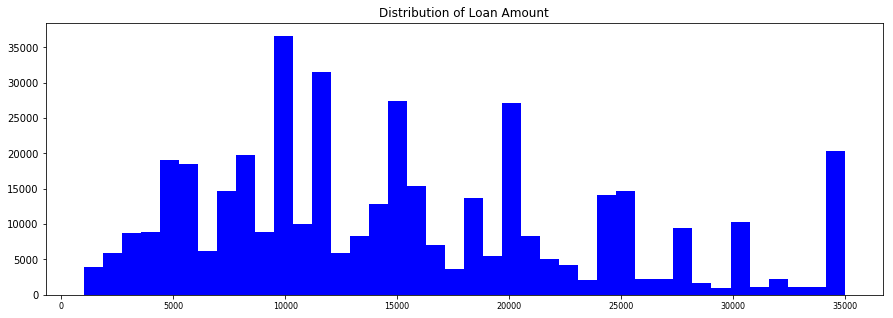

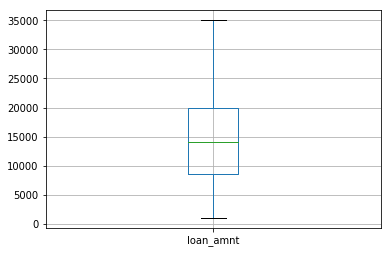

In [21]:
loan_amnt_distribution=pd.DataFrame(approved['loan_amnt'].value_counts())
loan_amnt_distribution.reset_index(inplace=True)
loan_amnt_distribution.columns=['loan_amount','number of applicants']
loan_amnt_distribution.head()

approved["loan_amnt"].hist(color = 'blue',xlabelsize= 8,bins = 40,figsize = [15,5], grid=False)
plt.title("Distribution of Loan Amount")
plt.show()

approved.boxplot(column='loan_amnt')
plt.show()


### Distribution of Annual Income

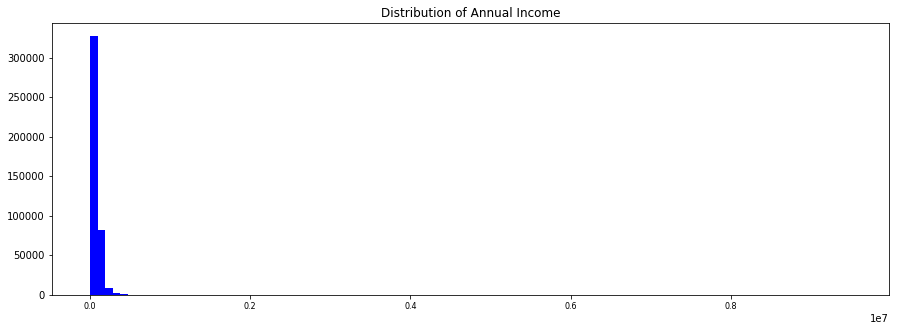

In [22]:
annual_inc_distribution=pd.DataFrame(approved['annual_inc'].value_counts())
annual_inc_distribution.reset_index(inplace=True)
annual_inc_distribution.columns=['annual_inc','number of applicants']
annual_inc_distribution.head()

approved["annual_inc"].hist(color = 'blue',xlabelsize= 8,bins = 100,figsize = [15,5], grid=False)
plt.title("Distribution of Annual Income")
plt.show()

### Distribution of Acc

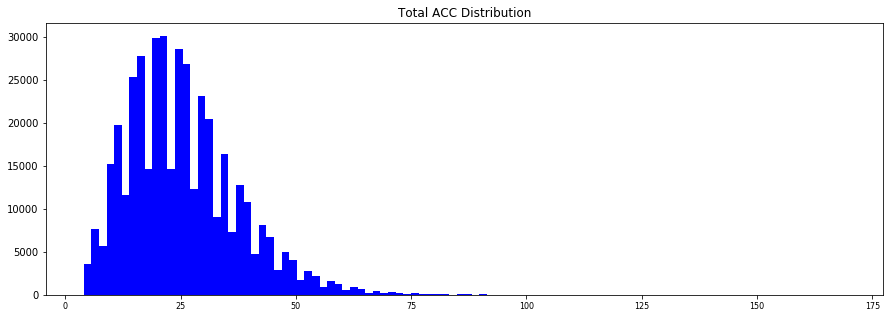

In [23]:
total_acc_distribution=pd.DataFrame(approved['total_acc'].value_counts())
total_acc_distribution.reset_index(inplace=True)
total_acc_distribution.columns=['total_acc','number of applicants']
total_acc_distribution.head()

approved["total_acc"].hist(color = 'blue',xlabelsize= 8,bins = 100,figsize = [15,5], grid=False)
plt.title("Total ACC Distribution")
plt.show()

### Distribution of Debt to Income

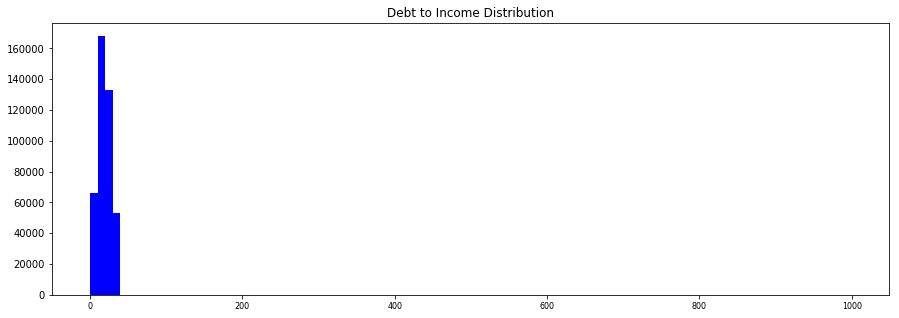

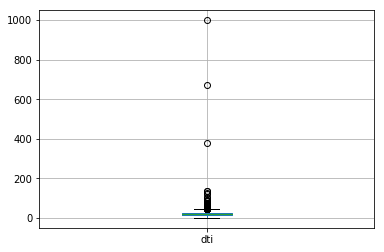

In [24]:
dti_distribution=pd.DataFrame(approved['dti'].value_counts())
dti_distribution.reset_index(inplace=True)
dti_distribution.columns=['dti','number of applicants']
dti_distribution.head()

approved["dti"].hist(color = 'blue',xlabelsize= 8,bins = 100,figsize = [15,5], grid=False)
plt.title("Debt to Income Distribution")
plt.show()

approved.boxplot(column='dti')
plt.show()

### Distribution of Employment Length

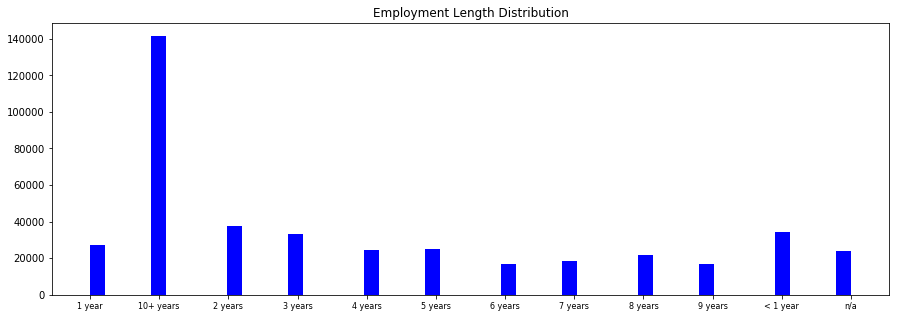

In [25]:
emp_length_distribution=pd.DataFrame(approved['emp_length'].value_counts())
emp_length_distribution.reset_index(inplace=True)
emp_length_distribution.columns=['emp_length','number of applicants']
emp_length_distribution.head()

approved["emp_length"].hist(color = 'blue',xlabelsize= 8,bins = 50,figsize = [15,5], grid=False)
plt.title("Employment Length Distribution")
plt.show()

### Distribution of Verification

In [26]:
verification_distribution=pd.DataFrame(approved['verification_status'].value_counts())
verification_distribution.reset_index(inplace=True)
verification_distribution.columns=['verification_status','number of applicants']
verification_distribution.head()

,verification_status,number of applicants
0,Source Verified,184768
1,Verified,123016
2,Not Verified,113309


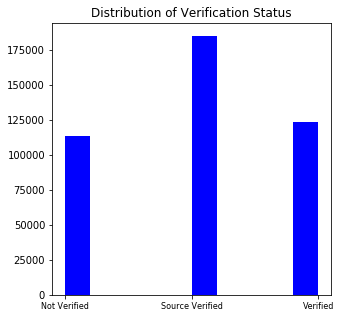

In [27]:
approved['verification_status'].hist(color = 'blue',xlabelsize= 8,bins = 10,figsize = [5,5], grid=False)
plt.title("Distribution of Verification Status")
plt.show()

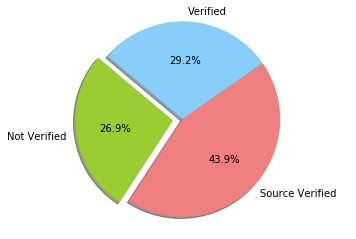

In [28]:
labels = 'Not Verified', 'Source Verified', 'Verified'
sizes = [113309,184768,123016]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

### Distribution of Grade

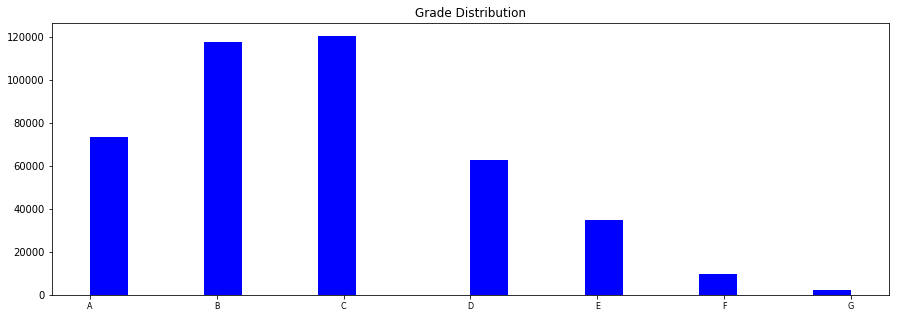

In [29]:
grade_distribution=pd.DataFrame(approved['grade'].value_counts())
grade_distribution.reset_index(inplace=True)
grade_distribution.columns=['grade','number of applicants']
grade_distribution.head()

approved["grade"].hist(color = 'blue',xlabelsize= 8,bins = 20,figsize = [15,5], grid=False)
plt.title("Grade Distribution")
plt.show()

### Distribution of Loan Status

In [30]:
loan_status_distribution=pd.DataFrame(approved['loan_status'].value_counts())
loan_status_distribution.reset_index(inplace=True)
loan_status_distribution.columns=['loan_status','number of applicants']
loan_status_distribution

,loan_status,number of applicants
0,Fully Paid,241221
1,Current,103807
2,Charged Off,69395
3,Late (31-120 days),3330
4,In Grace Period,2396
5,Late (16-30 days),942
6,Default,2


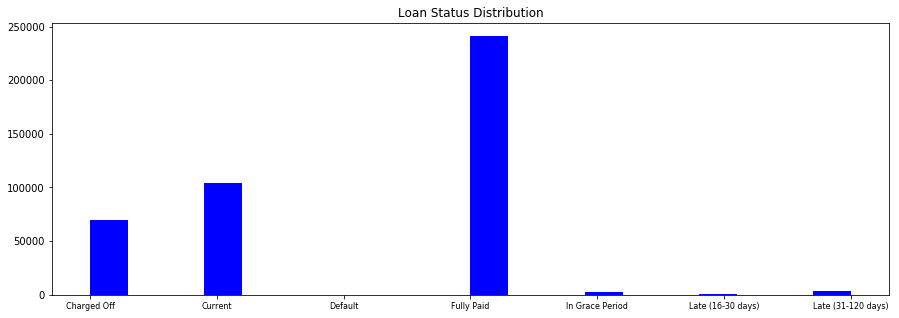

In [31]:
approved["loan_status"].hist(color = 'blue',xlabelsize= 8,bins = 20,figsize = [15,5], grid=False)
plt.title("Loan Status Distribution")
plt.show()

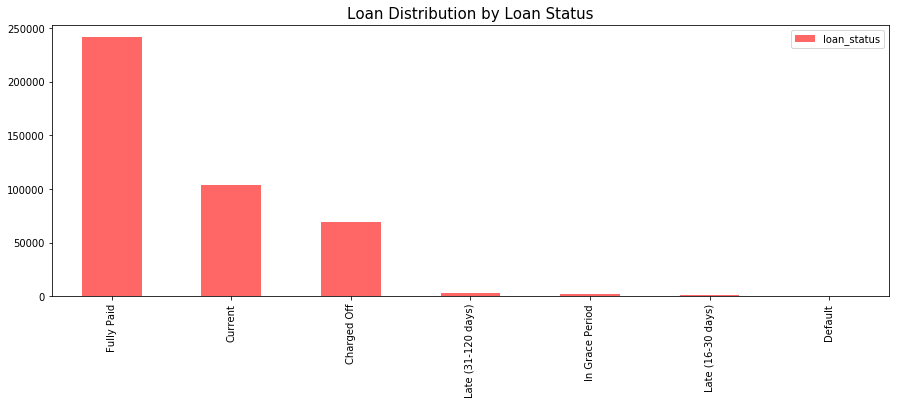

In [32]:
approved.loan_status.value_counts().plot(kind='bar',color='red',alpha=.6,legend=True, figsize = [15,5])
plt.title('Loan Distribution by Loan Status', fontsize = 15)
plt.show()

### Loan Status as Target Variable

We are going to use the loan status as the target variable for the logistic regression model. We can narrow it down into two categories of good loan and bad loan. A good loan would be a loan in good status. This would include those that are fully paid or current on their payments. A bad loan would be one that has gone bad with little possibility of being reversed. This would include a charged off loan (categorized as severely deliquent with little possibility of being paid off) or a defaulted loan. Those loans in the late or grace period categories will be removed since these loans could become a good or bad loan over time.

In [33]:
#map out loan status into 0 (bad loan), 1 (good loan) or 2 (neither):
approved['loan_status_separated'] = approved['loan_status'].map({'Current': 2, 'Fully Paid': 1, 'Charged Off': 0, 'Late(31-120 days)': 2, 'In Grace Period': 2, 'Late(16-30 days)': 2, 'Default': 0})

#remove all loan statuses that are neither(2):
approved = approved[approved.loan_status_separated != 2]

approved['loan_status_separated'] = approved['loan_status_separated'].apply(lambda loan_status_separated: 0 if loan_status_separated == 0 else 1)

approved.head()

,loan_amnt,funded_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,term,dti,revol_bal,total_acc,loan_status_separated
0,33600.0,33600.0,10.78%,B,8 years,RENT,104000.0,Source Verified,Fully Paid,36 months,14.01,28475.0,31.0,1
4,18000.0,18000.0,19.48%,E,7 years,RENT,150000.0,Not Verified,Charged Off,60 months,9.39,14052.0,27.0,0
7,4225.0,4225.0,14.85%,C,5 years,RENT,35000.0,Source Verified,Charged Off,36 months,15.22,1058.0,6.0,0
8,7200.0,7200.0,9.17%,B,10+ years,MORTGAGE,50000.0,Not Verified,Fully Paid,36 months,19.25,9051.0,25.0,1
9,20200.0,20200.0,18.49%,D,4 years,RENT,60000.0,Source Verified,Charged Off,60 months,34.84,8284.0,16.0,0


In [34]:
approved['loan_status_separated'].value_counts()

1    245493
0     69397
Name: loan_status_separated, dtype: int64

There are 3.5 times more "good loans" (paid) than "bad loans" (defaulted/charged off).

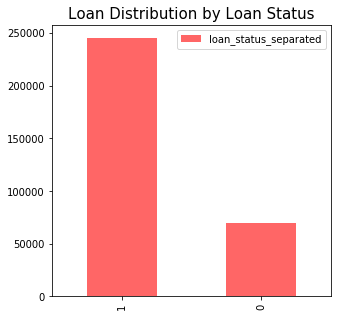

In [35]:
approved.loan_status_separated.value_counts().plot(kind='bar',color='red',alpha=.6,legend=True, figsize = [5,5])
plt.title('Loan Distribution by Loan Status', fontsize = 15)
plt.show()

### Categorize & Clean Verification Status

Verification_status indicates if income was verified by LC, not verified, or if the income source was verified.

In [36]:
approved['verification_status_separated'] = approved['verification_status'].map({'Source Verified': 1, 'Verified': 1, 'Not Verified':0})
#approved['verification_status_separated'] = approved["verification_status_separated"].apply(lambda verification_status_clean: 0 if verification_status_clean == 0 else 1)
approved.head()

,loan_amnt,funded_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,term,dti,revol_bal,total_acc,loan_status_separated,verification_status_separated
0,33600.0,33600.0,10.78%,B,8 years,RENT,104000.0,Source Verified,Fully Paid,36 months,14.01,28475.0,31.0,1,1
4,18000.0,18000.0,19.48%,E,7 years,RENT,150000.0,Not Verified,Charged Off,60 months,9.39,14052.0,27.0,0,0
7,4225.0,4225.0,14.85%,C,5 years,RENT,35000.0,Source Verified,Charged Off,36 months,15.22,1058.0,6.0,0,1
8,7200.0,7200.0,9.17%,B,10+ years,MORTGAGE,50000.0,Not Verified,Fully Paid,36 months,19.25,9051.0,25.0,1,0
9,20200.0,20200.0,18.49%,D,4 years,RENT,60000.0,Source Verified,Charged Off,60 months,34.84,8284.0,16.0,0,1


In [37]:
approved['verification_status_separated'].value_counts()


1    229003
0     85887
Name: verification_status_separated, dtype: int64

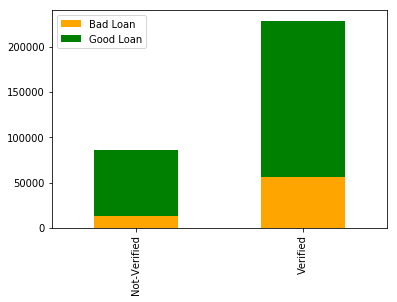

In [38]:
#Stacked Bar Chart of Verified vs Non-Verified Good & Bad Loans
loan_verification_chart=pd.crosstab(index=approved["verification_status_separated"],columns=approved["loan_status_separated"])
loan_verification_chart.columns = ["Bad Loan","Good Loan"]
loan_verification_chart.index = ["Not-Verified","Verified"]
loan_verification_chart.plot(kind='bar',stacked=True, color=['orange','green'])
plt.show()

There appears to be the same percentage of bad loans in both the verified and non-verified categories.

### Categorize & Clean Loan Grade

There are seven loan categories A to G. A is rated as the highest quality with G as the worst.

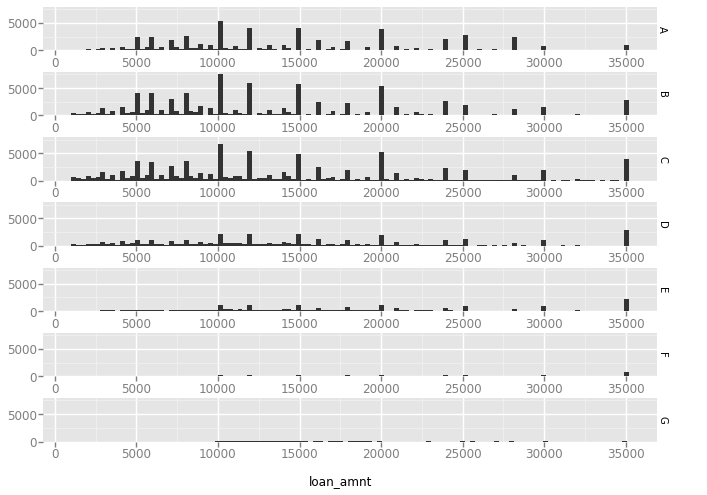

<ggplot: (7538106446)>

In [39]:
#Plot loan amounts vs loan grades
from ggplot import *
gg = ggplot(approved, aes('loan_amnt',col='grade')) + geom_histogram(binwidth=300)+facet_grid('grade')
gg

There appears to be many more loans approved for categories A-D than E-G.

In [40]:
#Categorize numerically with 1 being the highest grade
approved['grade_separated'] = approved['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
approved['grade_separated'].value_counts(ascending=False)

3    88506
2    86181
1    57996
4    46933
5    25838
6     7627
7     1809
Name: grade_separated, dtype: int64

In [41]:
sort_grades = pd.crosstab(index=approved["grade_separated"],columns=approved["loan_status_separated"], margins = True)
sort_grades.columns = ["Bad Loan","Good Loan","Row Total"]
sort_grades.index = ['1','2','3','4','5','6','7',"Column Total"]
sort_grades

,Bad Loan,Good Loan,Row Total
1,3679,54317,57996
2,12652,73529,86181
3,21366,67140,88506
4,15855,31078,46933
5,10964,14874,25838
6,3914,3713,7627
7,967,842,1809
Column Total,69397,245493,314890


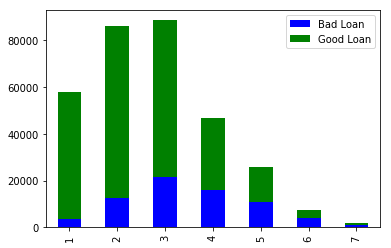

In [42]:
sort_grades2 = pd.crosstab(approved['grade_separated'], approved['loan_status_separated'])
sort_grades2.columns = ["Bad Loan","Good Loan"]
sort_grades2.index = ['1','2','3','4','5','6','7']
sort_grades2.plot(kind='bar', stacked=True, color=['blue','green'])

Loans categorized A to C have a low level of being a bad loan while D-G appear to have almost a 50% chance of being a bad loan.

###  Categorize & Clean Home Ownership

The home ownership status was provided by the borrower during registration or obtained from the credit report. These values are: RENT, OWN, MORTGAGE, OTHER.

In [43]:
home_ownership_separated=pd.DataFrame(approved.home_ownership.value_counts())
home_ownership_separated.reset_index(inplace=True)
home_ownership_separated.columns=['Home Ownership','Number of applicants']
print(home_ownership_separated)

  Home Ownership  Number of applicants
0       MORTGAGE                152935
1           RENT                127978
2            OWN                 33976
3            ANY                     1


To further simplify we can combine mortgage/own in one group and rent/any in a second group. 

In [44]:
approved['home_ownership_separated'] = approved['home_ownership'].map({'MORTGAGE': 1, 'OWN': 1, 'RENT':0, 'ANY':0})
#approved["home_ownership_separated"] = approved["home_ownership_separated2"].apply(lambda home_ownership_separated2: 0 if home_ownership_separated2 == 0 else 1)

In [45]:
approved['home_ownership_separated'].value_counts()

1    186911
0    127979
Name: home_ownership_separated, dtype: int64

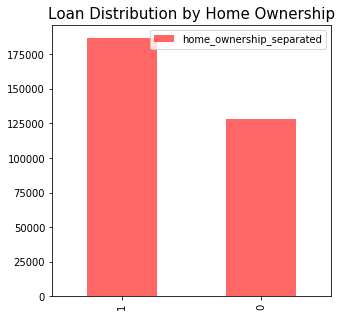

In [46]:
approved.home_ownership_separated.value_counts().plot(kind='bar',color='red',alpha=.6,legend=True, figsize = [5,5])
plt.title('Loan Distribution by Home Ownership', fontsize = 15)
plt.show()

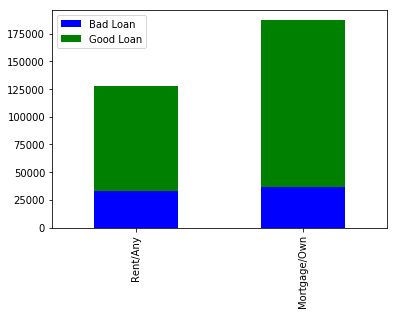

In [47]:
sort_HO = pd.crosstab(approved['home_ownership_separated'], approved['loan_status_separated'])
sort_HO.columns = ["Bad Loan","Good Loan"]
sort_HO.index = ['Rent/Any','Mortgage/Own']
sort_HO.plot(kind='bar', stacked=True, color=['blue','green'])

There appears to be a larger number of bad loans in the rent/any category than the mortgage/own category.

### Categorize & Clean Employment Length

Employment length is listed in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [48]:
approved['emp_length'].sort_values(ascending=True).value_counts()

10+ years    103427
2 years       28567
< 1 year      26008
3 years       25301
1 year        20998
5 years       18838
4 years       18569
n/a           17781
8 years       16306
7 years       13913
6 years       12627
9 years       12555
Name: emp_length, dtype: int64

* In order to clean up the variables we can change 'n/a' to Nan, and then replace it with 0. 
* To simplify we can also combine less than a year with one year.

In [49]:
#replace n/a with NaN
approved['emp_length_separated'] = approved['emp_length']
approved.replace('n/a', np.nan,inplace=True)

#replace NaN with 0
approved.emp_length_separated.fillna(value=0,inplace=True)

#replace < with space
approved['emp_length_separated'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

approved.emp_length_separated.value_counts()

10    103427
1      47006
2      28567
3      25301
5      18838
4      18569
0      17781
8      16306
7      13913
6      12627
9      12555
Name: emp_length_separated, dtype: int64

In [50]:
emp_length_table = pd.crosstab(index=approved["emp_length_separated"],columns=approved["loan_status_separated"], margins = True)
emp_length_table.columns = ["Bad Loan","Good Loan","Row Total"]
emp_length_table.index = ['0 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', ' 7 years' ,'8 years', '9 years', '10+ years','Column Total']
emp_length_table

,Bad Loan,Good Loan,Row Total
0 year,5096,12685,17781
1 year,10594,36412,47006
2 years,21510,81917,103427
3 years,6231,22336,28567
4 years,5540,19761,25301
5 years,4102,14467,18569
6 years,4138,14700,18838
7 years,2742,9885,12627
8 years,3055,10858,13913
9 years,3617,12689,16306


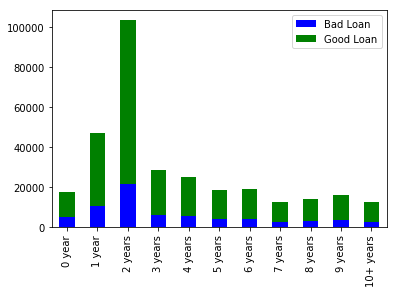

In [51]:
emp_length_table2 = pd.crosstab(approved['emp_length_separated'], approved['loan_status_separated'])
emp_length_table2.columns = ["Bad Loan","Good Loan"]
emp_length_table2.index = ['0 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', ' 7 years' ,'8 years', '9 years', '10+ years']

emp_length_table2.plot(kind='bar', stacked=True, color=['blue','green'])

There does not seem to be any significant visible increase of default based on years of employment in the approved loans. 

### Categorize & Clean Term

In [52]:
approved['term_separated'] = approved['term'].map({' 36 months': 1, ' 60 months': 0})
#approved["term_separated"] = approved["term_separated"].apply(lambda term_separated: 0 if term_separated == 0 else 1)
approved.head(10)

,loan_amnt,funded_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,term,dti,revol_bal,total_acc,loan_status_separated,verification_status_separated,grade_separated,home_ownership_separated,emp_length_separated,term_separated
0,33600.0,33600.0,10.78%,B,8 years,RENT,104000.0,Source Verified,Fully Paid,36 months,14.01,28475.0,31.0,1,1,2,0,8,1
4,18000.0,18000.0,19.48%,E,7 years,RENT,150000.0,Not Verified,Charged Off,60 months,9.39,14052.0,27.0,0,0,5,0,7,0
7,4225.0,4225.0,14.85%,C,5 years,RENT,35000.0,Source Verified,Charged Off,36 months,15.22,1058.0,6.0,0,1,3,0,5,1
8,7200.0,7200.0,9.17%,B,10+ years,MORTGAGE,50000.0,Not Verified,Fully Paid,36 months,19.25,9051.0,25.0,1,0,2,1,10,1
9,20200.0,20200.0,18.49%,D,4 years,RENT,60000.0,Source Verified,Charged Off,60 months,34.84,8284.0,16.0,0,1,4,0,4,0
10,12000.0,12000.0,10.78%,B,1 year,RENT,98000.0,Not Verified,Fully Paid,36 months,24.04,20462.0,39.0,1,0,2,0,1,1
11,12000.0,12000.0,9.17%,B,4 years,MORTGAGE,39400.0,Not Verified,Fully Paid,36 months,26.32,10495.0,25.0,1,0,2,1,4,1
13,8800.0,8800.0,9.80%,B,10+ years,MORTGAGE,92000.0,Source Verified,Fully Paid,36 months,5.18,9195.0,24.0,1,1,2,1,10,1
17,20000.0,20000.0,10.78%,B,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,60 months,10.78,7869.0,18.0,1,0,2,1,10,0
18,21000.0,21000.0,13.44%,C,2 years,RENT,54649.0,Source Verified,Fully Paid,60 months,12.14,1581.0,44.0,1,1,3,0,2,0


In [53]:
term_separated_table = pd.crosstab(index=approved["term_separated"],columns=approved["loan_status_separated"], margins = True)
term_separated_table.columns = ["Bad Loan","Good Loan","Row Total"]
term_separated_table.index = ["60 months","36 months","Column Total"]
term_separated_table

,Bad Loan,Good Loan,Row Total
60 months,29518,51202,80720
36 months,39879,194291,234170
Column Total,69397,245493,314890


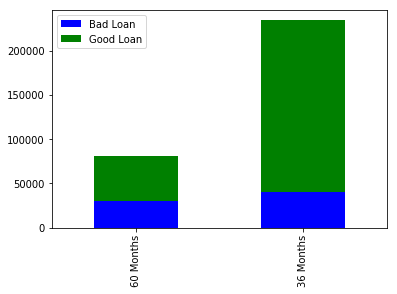

In [54]:
sort_T = pd.crosstab(approved['term_separated'], approved['loan_status_separated'])
sort_T.columns = ["Bad Loan","Good Loan"]
sort_T.index = ['60 Months','36 Months']
sort_T.plot(kind='bar', stacked=True, color=['blue','green'])

There is a significant larger number of defaults/Charge offs in the 60 month term vs the 36 month term. Considering many more loans were approved for 36 month term periods this may be an indicator of a good vs bad loan.

In [55]:
approved.head()

,loan_amnt,funded_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,term,dti,revol_bal,total_acc,loan_status_separated,verification_status_separated,grade_separated,home_ownership_separated,emp_length_separated,term_separated
0,33600.0,33600.0,10.78%,B,8 years,RENT,104000.0,Source Verified,Fully Paid,36 months,14.01,28475.0,31.0,1,1,2,0,8,1
4,18000.0,18000.0,19.48%,E,7 years,RENT,150000.0,Not Verified,Charged Off,60 months,9.39,14052.0,27.0,0,0,5,0,7,0
7,4225.0,4225.0,14.85%,C,5 years,RENT,35000.0,Source Verified,Charged Off,36 months,15.22,1058.0,6.0,0,1,3,0,5,1
8,7200.0,7200.0,9.17%,B,10+ years,MORTGAGE,50000.0,Not Verified,Fully Paid,36 months,19.25,9051.0,25.0,1,0,2,1,10,1
9,20200.0,20200.0,18.49%,D,4 years,RENT,60000.0,Source Verified,Charged Off,60 months,34.84,8284.0,16.0,0,1,4,0,4,0


### Create Dummy Variables

In [56]:
approved2 = approved[['loan_status_separated','verification_status_separated','grade_separated',
                      'home_ownership_separated','emp_length_separated','term_separated']]

In [57]:
#dummies = pd.get_dummies(approved2['loan_status_separated']).rename(columns=lambda x: 'loan_status_separated_' + str(x))
#approved2 = pd.concat([approved2, dummies], axis=1)
#approved2 = approved2.drop(['loan_status_separated'], axis=1)
#approved2.head()

In [58]:
dummies = pd.get_dummies(approved2['verification_status_separated']).rename(columns=lambda x: 'verification_status_separated_' + str(x))
approved2 = pd.concat([approved2, dummies], axis=1)
approved2 = approved2.drop(['verification_status_separated'], axis=1)
approved2.head()

,loan_status_separated,grade_separated,home_ownership_separated,emp_length_separated,term_separated,verification_status_separated_0,verification_status_separated_1
0,1,2,0,8,1,0,1
4,0,5,0,7,0,1,0
7,0,3,0,5,1,0,1
8,1,2,1,10,1,1,0
9,0,4,0,4,0,0,1


In [59]:
dummies = pd.get_dummies(approved2['grade_separated']).rename(columns=lambda x: 'grade_separated_' + str(x))
approved2 = pd.concat([approved2, dummies], axis=1)
approved2 = approved2.drop(['grade_separated'], axis=1)
approved2.head()

,loan_status_separated,home_ownership_separated,emp_length_separated,term_separated,verification_status_separated_0,verification_status_separated_1,grade_separated_1,grade_separated_2,grade_separated_3,grade_separated_4,grade_separated_5,grade_separated_6,grade_separated_7
0,1,0,8,1,0,1,0,1,0,0,0,0,0
4,0,0,7,0,1,0,0,0,0,0,1,0,0
7,0,0,5,1,0,1,0,0,1,0,0,0,0
8,1,1,10,1,1,0,0,1,0,0,0,0,0
9,0,0,4,0,0,1,0,0,0,1,0,0,0


In [60]:
dummies = pd.get_dummies(approved2['home_ownership_separated']).rename(columns=lambda x: 'home_ownership_separated_' + str(x))
approved2 = pd.concat([approved2, dummies], axis=1)
approved2 = approved2.drop(['home_ownership_separated'], axis=1)
approved2.head()

,loan_status_separated,emp_length_separated,term_separated,verification_status_separated_0,verification_status_separated_1,grade_separated_1,grade_separated_2,grade_separated_3,grade_separated_4,grade_separated_5,grade_separated_6,grade_separated_7,home_ownership_separated_0,home_ownership_separated_1
0,1,8,1,0,1,0,1,0,0,0,0,0,1,0
4,0,7,0,1,0,0,0,0,0,1,0,0,1,0
7,0,5,1,0,1,0,0,1,0,0,0,0,1,0
8,1,10,1,1,0,0,1,0,0,0,0,0,0,1
9,0,4,0,0,1,0,0,0,1,0,0,0,1,0


In [61]:
dummies = pd.get_dummies(approved2['emp_length_separated']).rename(columns=lambda x: 'emp_length_separated_' + str(x))
approved2 = pd.concat([approved2, dummies], axis=1)
approved2 = approved2.drop(['emp_length_separated'], axis=1)
approved2.head()

,loan_status_separated,term_separated,verification_status_separated_0,verification_status_separated_1,grade_separated_1,grade_separated_2,grade_separated_3,grade_separated_4,grade_separated_5,grade_separated_6,grade_separated_7,home_ownership_separated_0,home_ownership_separated_1,emp_length_separated_0,emp_length_separated_1,emp_length_separated_10,emp_length_separated_2,emp_length_separated_3,emp_length_separated_4,emp_length_separated_5,emp_length_separated_6,emp_length_separated_7,emp_length_separated_8,emp_length_separated_9
0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
8,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [62]:
dummies = pd.get_dummies(approved2['term_separated']).rename(columns=lambda x: 'term_separated_' + str(x))
approved2 = pd.concat([approved2, dummies], axis=1)
approved2 = approved2.drop(['term_separated'], axis=1)
approved2.head()

,loan_status_separated,verification_status_separated_0,verification_status_separated_1,grade_separated_1,grade_separated_2,grade_separated_3,grade_separated_4,grade_separated_5,grade_separated_6,grade_separated_7,home_ownership_separated_0,home_ownership_separated_1,emp_length_separated_0,emp_length_separated_1,emp_length_separated_10,emp_length_separated_2,emp_length_separated_3,emp_length_separated_4,emp_length_separated_5,emp_length_separated_6,emp_length_separated_7,emp_length_separated_8,emp_length_separated_9,term_separated_0,term_separated_1
0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
9,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### Create Dataframe for Model

In [63]:
approved2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314890 entries, 0 to 421094
Data columns (total 25 columns):
loan_status_separated              314890 non-null int64
verification_status_separated_0    314890 non-null uint8
verification_status_separated_1    314890 non-null uint8
grade_separated_1                  314890 non-null uint8
grade_separated_2                  314890 non-null uint8
grade_separated_3                  314890 non-null uint8
grade_separated_4                  314890 non-null uint8
grade_separated_5                  314890 non-null uint8
grade_separated_6                  314890 non-null uint8
grade_separated_7                  314890 non-null uint8
home_ownership_separated_0         314890 non-null uint8
home_ownership_separated_1         314890 non-null uint8
emp_length_separated_0             314890 non-null uint8
emp_length_separated_1             314890 non-null uint8
emp_length_separated_10            314890 non-null uint8
emp_length_separated_2            

In [64]:
approved2.head()

,loan_status_separated,verification_status_separated_0,verification_status_separated_1,grade_separated_1,grade_separated_2,grade_separated_3,grade_separated_4,grade_separated_5,grade_separated_6,grade_separated_7,home_ownership_separated_0,home_ownership_separated_1,emp_length_separated_0,emp_length_separated_1,emp_length_separated_10,emp_length_separated_2,emp_length_separated_3,emp_length_separated_4,emp_length_separated_5,emp_length_separated_6,emp_length_separated_7,emp_length_separated_8,emp_length_separated_9,term_separated_0,term_separated_1
0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
9,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [65]:
# save clean data to new file for faster accessibility in the future
filename = 'approved2' + str(date.today()) + '.csv'
approved2.to_csv(filename, date_format='%Y-%m-%d %H:%M:%S', index = False)

In [66]:
# save clean data to new file for faster accessibility in the future
filename = 'approved' + str(date.today()) + '.csv'
approved.to_csv(filename, date_format='%Y-%m-%d %H:%M:%S', index = False)